In [1]:
#Import the necessary Python moduless
import pandas as pd
import pyproj
from functools import partial
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

In [2]:
from shapely import wkt
from shapely.geometry import Point, Polygon, MultiPolygon
import shapely.speedups
shapely.speedups.enable()

In [3]:
df = pd.read_csv('data_hillcrest.csv')
df['geometry'] = df.apply(lambda z: Point(z.lat, z.lon), axis=1)
df = gpd.GeoDataFrame(df)

lon = [-117.113323, -117.205429]
lat = [32.702416,     32.767976] # this is hillcrest

##UCSD

#df = pd.read_csv('data_UCSD.csv')
#df['geometry'] = df.apply(lambda z: Point(z.lat, z.lon), axis=1)
#df = gpd.GeoDataFrame(df)

#lon = [-117.249233, -117.212937]
#lat = [32.868004,     32.892945] # this is UCSD

In [4]:
# read and view GeoDataFrame

df.drop(["hash","ubid","height_source","grid","fp_source","geometry"], inplace = True, axis = 1)

from shapely import wkt
import shapely.speedups
shapely.speedups.enable()

# convert string polygons to shapes
df['fp'] = df['fp'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='fp')

df['area'] = df['fp'].area

In [5]:
pointList = []

for x in lon:
    for y in lat:
        pointList.append( [x,y] )

pointList[2], pointList[3] = pointList[3], pointList[2]
        
geom = Polygon( pointList )

In [6]:
# translate the area of interest to a GeoDataFrame

area = gpd.GeoDataFrame(index = [0], crs = "epsg:4326", geometry = [geom] )

# translate the area of interest to a GeoDataFrame

crs  = {'init': 'epsg:4326'}
area = gpd.GeoDataFrame(crs = crs, geometry = [geom])

In [7]:
# use the OSMnx package to confirm city limits

G = ox.graph_from_polygon(geom, network_type = "drive")
nodes, roads = ox.graph_to_gdfs(G)

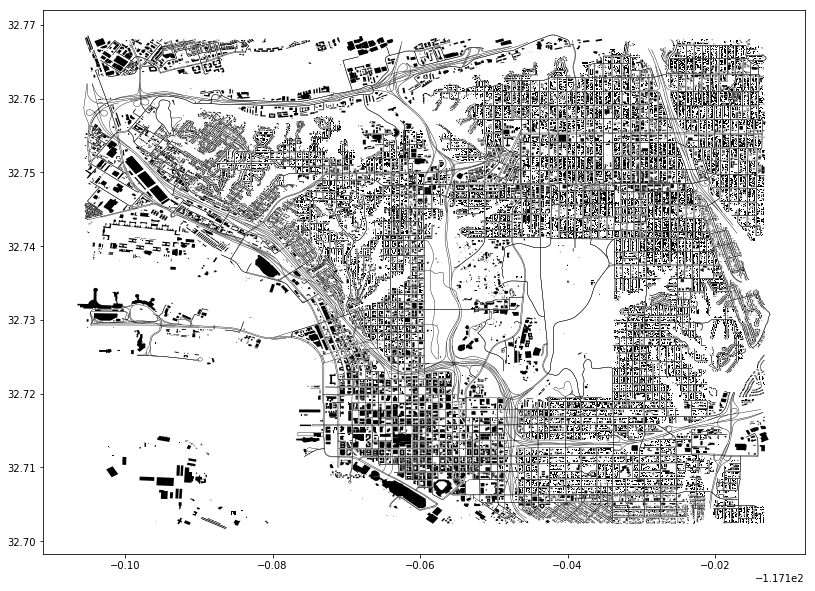

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))

roads.plot(ax = ax, linewidth = 0.4, edgecolor = 'black')
#UCSD.plot(ax = ax, linewidth = 1, edgecolor = 'black', facecolor = 'none')

df.plot(ax = ax, color = 'black')

plt.savefig('filename.png', dpi = 300)